# Demonstration of the instability of likelihood-based training

In [1]:
%matplotlib inline

import numpy as np
from scipy.stats import norm
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import plot_settings as ps


In [2]:
ps.setup()

## Models

In [3]:
def f(x):
    return 0.8* np.exp(- 3 * x**2) * (np.sin((x-0.5) * 0.5 * np.pi)) + 0.2 + 0.4*x


def af_std(x, y):
    return 0.08 + 0.42 * x**2


def logp_flm(x, y):
    return norm(loc=0., scale=0.4).logpdf(x)
    
    
def logp_perp(x, y):
    return norm(loc=f(x), scale=af_std(x, y)).logpdf(y)


def logp_af(x, y):
    return logp_flm(x, y) + logp_perp(x, y)


def sample(n, noise=0, cutoff=1.):
    x = np.random.normal(loc=0., scale=0.4, size=n)
    x = x[x**2 < cutoff**2]
    y = f(x) + np.random.normal(loc=0., scale=noise, size=len(x))
    return x, y


## Generate data

In [4]:
n_data = 500
noise_data = 0
x_data, y_data = sample(n_data, noise_data)
z_data = np.zeros_like(x_data)


In [5]:
res_af = 90

x_af_grid, y_af_grid = np.meshgrid(np.linspace(-1., 1., res_af), np.linspace(-1., 1., res_af))
x_af_grid, y_af_grid = x_af_grid.flatten(), y_af_grid.flatten()

z_af_grid = np.exp(logp_af(x_af_grid, y_af_grid))
    

In [6]:
res_flm = 80

x_flm_curve = np.linspace(-1., 1., res_flm)
y_flm_curve = f(x_flm_curve)
z_flm_curve = np.exp(logp_flm(x_flm_curve, y_flm_curve))

# Construct polygons for plotting
flm_vertices = []
for x0, y0, z0, x1, y1, z1 in zip(
    x_flm_curve[:-1], y_flm_curve[:-1], z_flm_curve[:-1], 
    x_flm_curve[1:], y_flm_curve[1:], z_flm_curve[1:]
):
    flm_vertices.append([(x0, y0, 0.), (x0, y0, z0), (x1, y1, z1), (x1, y1, 0.)])


## Plot

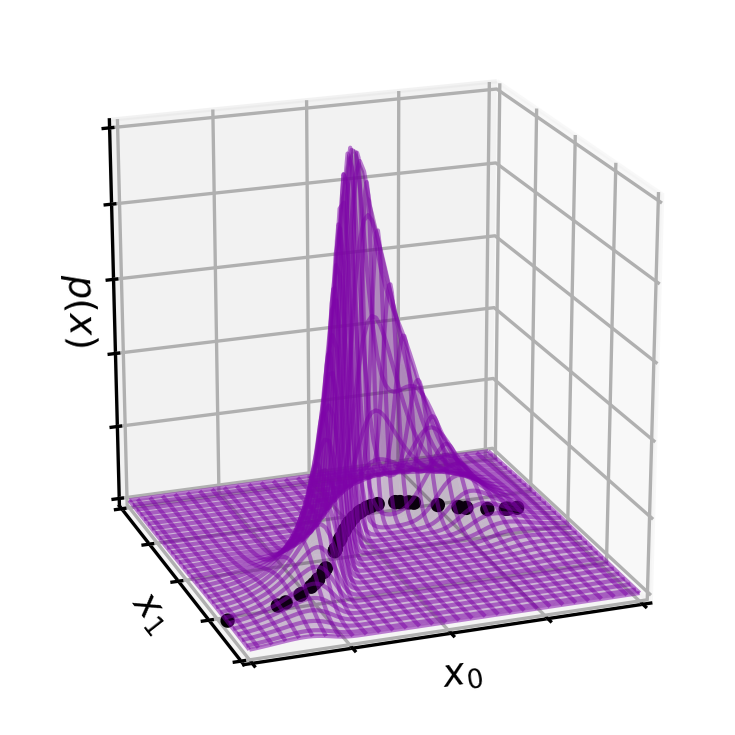

In [7]:
n_show = 40
xrange = (-1., 1.)
yrange = (-1., 1.)
zrange = (0., 5.)

fig, ax = ps.figure(height=0.25*ps.TEXTWIDTH, cbar=False, make3d=True, large_margin=0.01, small_margin=0.01)

# Data points
ax.scatter(x_data[:n_show], y_data[:n_show], np.zeros(n_show), alpha=1., s=6., c=[ps.COLOR_NEUTRAL1])

# MFMF density
ax.plot_surface(
    x_af_grid.reshape(res_af, res_af),
    y_af_grid.reshape(res_af, res_af),
    z_af_grid.reshape(res_af, res_af),
    color=ps.add_transparency(ps.COLOR_FLMA, 0.25),
)
ax.plot_wireframe(
    x_af_grid.reshape(res_af, res_af),
    y_af_grid.reshape(res_af, res_af),
    z_af_grid.reshape(res_af, res_af),
    color=ps.add_transparency(ps.COLOR_FLMA, 0.5),
    lw=1.,
    rstride=3,
    cstride=3
)

# Axis ranges and view
ax.set_xlim3d(*xrange)
ax.set_ylim3d(*yrange)
ax.set_zlim3d(*zrange)
ax.view_init(20, 70)
ax.dist=9.

# Labels
ax.set_xlabel("$x_0$", labelpad=-15.)
ax.set_ylabel("$x_1$", labelpad=-15.)
ax.set_zlabel(r"$p(x)$", labelpad=-15.)
ax.set_xticklabels([""]*5)
ax.set_yticklabels([""]*5)
ax.set_zticklabels([""]*5)

plt.savefig("../figures/manifold_density_illustration_af_talks.pdf")


In [ ]:
n_show = 40
xrange = (-1., 1.)
yrange = (-1., 1.)
zrange = (0., 5.)

fig, ax = ps.figure(height=0.25*ps.TEXTWIDTH, cbar=False, make3d=True, large_margin=0.01, small_margin=0.01)

# Data points
ax.scatter(x_data[:n_show], y_data[:n_show], np.zeros(n_show), alpha=1., s=6., c=[ps.COLOR_NEUTRAL1])

# MFMF density
ax.plot_surface(
    x_af_grid.reshape(res_af, res_af),
    y_af_grid.reshape(res_af, res_af),
    z_af_grid.reshape(res_af, res_af),
    color=ps.add_transparency(ps.COLOR_AF, 0.25),
)
ax.plot_wireframe(
    x_af_grid.reshape(res_af, res_af),
    y_af_grid.reshape(res_af, res_af),
    z_af_grid.reshape(res_af, res_af),
    color=ps.add_transparency(ps.COLOR_AF, 0.5),
    lw=1.,
    rstride=3,
    cstride=3
)

# Axis ranges and view
ax.set_xlim3d(*xrange)
ax.set_ylim3d(*yrange)
ax.set_zlim3d(*zrange)
ax.view_init(20, 70)
ax.dist=9.

# Labels
ax.set_xlabel("$x_0$", labelpad=-15.)
ax.set_ylabel("$x_1$", labelpad=-15.)
ax.set_zlabel(r"$p(x)$", labelpad=-15.)
ax.set_xticklabels([""]*5)
ax.set_yticklabels([""]*5)
ax.set_zticklabels([""]*5)

plt.savefig("../figures/manifold_density_illustration_af.pdf")


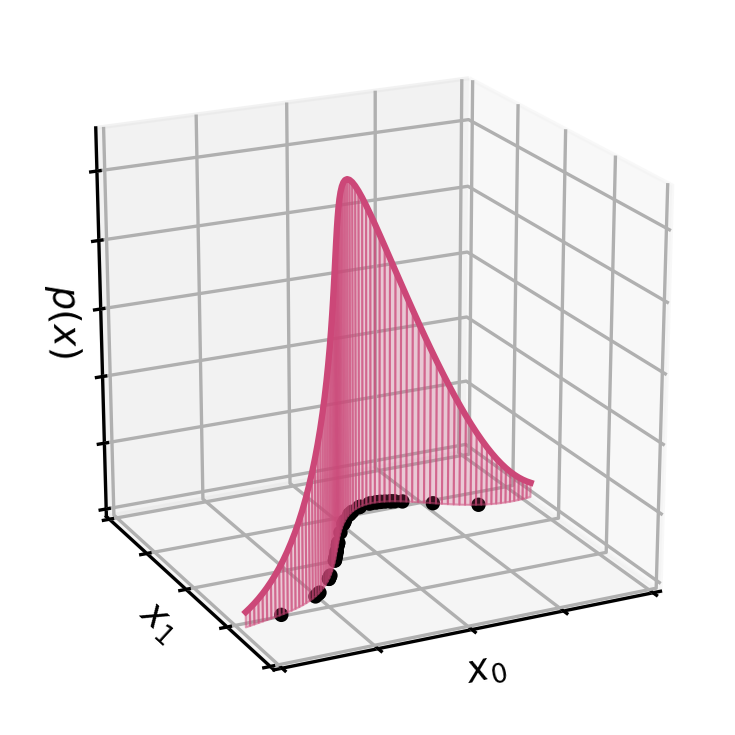

In [8]:
n_show = 40
xrange = (-1., 1.)
yrange = (-1., 1.)
zrange = (0., 1.1)

fig, ax = ps.figure(height=0.25*ps.TEXTWIDTH, cbar=False, make3d=True, large_margin=0.01, small_margin=0.01)

# Data points
ax.scatter(x_data[:n_show], y_data[:n_show], np.zeros(n_show), alpha=1., s=6., c=[ps.COLOR_NEUTRAL1])

# FLM density
poly = Poly3DCollection(
    flm_vertices,
    facecolors=[ps.add_transparency(ps.COLORS[2], alpha=0.25) for _ in flm_vertices],
    edgecolors=[ps.add_transparency(ps.COLORS[2], alpha=0.5) for _ in flm_vertices],
    lw=0.5
)
ax.add_collection3d(poly, zdir='z')
ax.plot(x_flm_curve, y_flm_curve, z_flm_curve, c=ps.COLORS[2], lw=1.5)

# Axis ranges and view
ax.set_xlim3d(*xrange)
ax.set_ylim3d(*yrange)
ax.set_zlim3d(*zrange)
ax.view_init(20, 64)
ax.dist=9.

# Labels
ax.set_xlabel("$x_0$", labelpad=-15.)
ax.set_ylabel("$x_1$", labelpad=-15.)
ax.set_zlabel(r"$p(x)$", labelpad=-15.)
ax.set_xticklabels([""]*5)
ax.set_yticklabels([""]*5)
ax.set_zticklabels([""]*5)

plt.savefig("../figures/manifold_density_illustration_mf_red.pdf")



In [ ]:
n_show = 40
xrange = (-1., 1.)
yrange = (-1., 1.)
zrange = (0., 1.1)

fig, ax = ps.figure(height=0.25*ps.TEXTWIDTH, cbar=False, make3d=True, large_margin=0.01, small_margin=0.01)

# Data points
ax.scatter(x_data[:n_show], y_data[:n_show], np.zeros(n_show), alpha=1., s=6., c=[ps.COLOR_NEUTRAL1])

# FLM density
poly = Poly3DCollection(
    flm_vertices,
    facecolors=[ps.add_transparency(ps.COLOR_FLMA, alpha=0.25) for _ in flm_vertices],
    edgecolors=[ps.add_transparency(ps.COLOR_FLMA, alpha=0.5) for _ in flm_vertices],
    lw=0.5
)
ax.add_collection3d(poly, zdir='z')
ax.plot(x_flm_curve, y_flm_curve, z_flm_curve, c=ps.COLOR_FLMA, lw=1.5)

# Axis ranges and view
ax.set_xlim3d(*xrange)
ax.set_ylim3d(*yrange)
ax.set_zlim3d(*zrange)
ax.view_init(20, 64)
ax.dist=9.

# Labels
ax.set_xlabel("$x_0$", labelpad=-15.)
ax.set_ylabel("$x_1$", labelpad=-15.)
ax.set_zlabel(r"$p(x)$", labelpad=-15.)
ax.set_xticklabels([""]*5)
ax.set_yticklabels([""]*5)
ax.set_zticklabels([""]*5)

plt.savefig("../figures/manifold_density_illustration_mf.pdf")
